Inputs:
- Latitude/Longitude: 48.865, 9.314
- Dachneigung zur Straße: 48º, Bearing: 285º (WNW), Azimuth: -75º
- Dachneigung zum Garten: 42º, Azimuth: 105º (OSO)

Links:
- [Stromverbrauch Haushalt - DeStatis](https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Umwelt/UGR/private-haushalte/Tabellen/stromverbrauch-haushalte.html)
- [PVGis Hourly](https://re.jrc.ec.europa.eu/pvg_tools/en/#api_5.3)
- [Sample data](https://data.open-power-system-data.org/household_data/)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Verbrauch

In [3]:
df_raw = pd.read_csv('data/household_data_15min_singleindex_filtered.csv')
df = df_raw[['cet_cest_timestamp', 'DE_KN_residential2_circulation_pump', 'DE_KN_residential2_dishwasher', 'DE_KN_residential2_freezer', 'DE_KN_residential2_grid_import', 'DE_KN_residential2_washing_machine']]
df['cet_cest_timestamp'] = pd.to_datetime(df['cet_cest_timestamp'])



C:\Users\MBE7RNG\AppData\Local\Temp\ipykernel_20700\3289623215.py:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['cet_cest_timestamp'] = pd.to_datetime(df['cet_cest_timestamp'])
C:\Users\MBE7RNG\AppData\Local\Temp\ipykernel_20700\3289623215.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cet_cest_timestamp'] = pd.to_datetime(df['cet_cest_timestamp'])


In [4]:

pd.set_option('display.max_columns', None)
df.describe()

,DE_KN_residential2_circulation_pump,DE_KN_residential2_dishwasher,DE_KN_residential2_freezer,DE_KN_residential2_grid_import,DE_KN_residential2_washing_machine
count,79291.000000,76530.000000,41000.000000,63190.000000,98929.000000
mean,408.478312,257.668013,70.824098,2017.367124,192.610964
std,267.110209,172.519108,40.778982,1276.663667,129.805147
min,0.000750,0.000101,0.000100,0.000000,0.000000
25%,130.164747,109.456075,34.939569,843.123657,76.808005
50%,447.996264,243.549283,72.537402,1988.907816,174.098393
75%,595.965258,401.277489,106.246301,3055.754496,312.910596
max,868.885241,596.350605,140.504637,4495.448099,428.020307


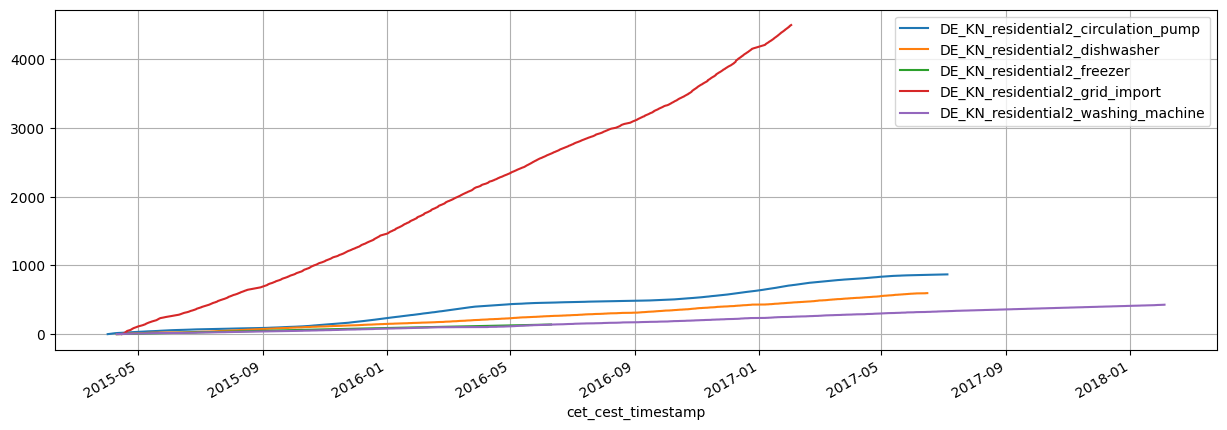

In [5]:
df.plot(x='cet_cest_timestamp', y=[
    'DE_KN_residential2_circulation_pump', 'DE_KN_residential2_dishwasher', 'DE_KN_residential2_freezer', 
    'DE_KN_residential2_grid_import', 'DE_KN_residential2_washing_machine'
], figsize=(15, 5))
plt.grid()

<Axes: xlabel='cet_cest_timestamp'>

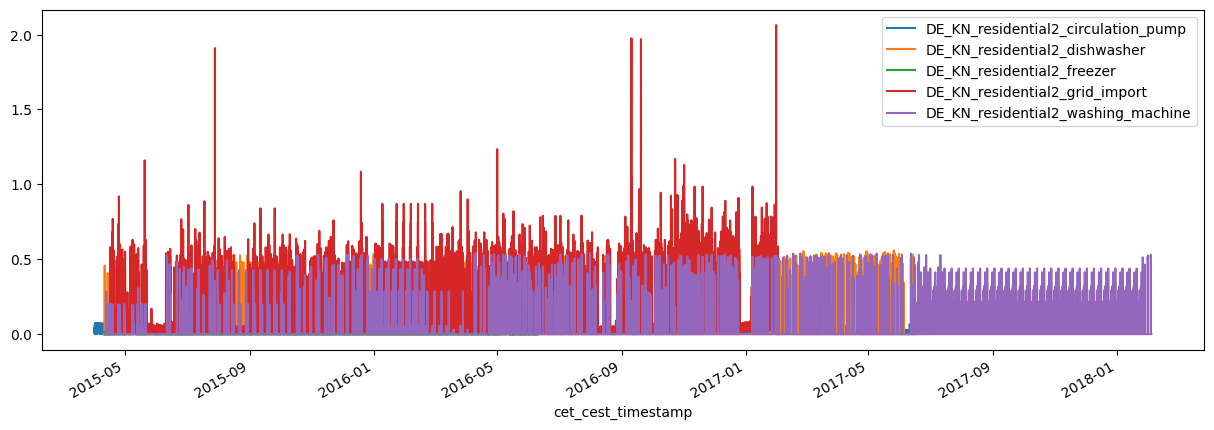

In [6]:

df_diff = df.copy()
for column in df.columns:
    if column != 'cet_cest_timestamp':
        df_diff[column] = df[column].diff()
df_diff.plot(x='cet_cest_timestamp', y=[
    'DE_KN_residential2_circulation_pump', 'DE_KN_residential2_dishwasher', 'DE_KN_residential2_freezer', 
    'DE_KN_residential2_grid_import', 'DE_KN_residential2_washing_machine'
], figsize=(15, 5))


In [7]:
df['cet_cest_timestamp'].min()

Timestamp('2014-12-11 18:45:00+0100', tz='UTC+01:00')

In [8]:
df['cet_cest_timestamp'].max()

Timestamp('2019-05-02 00:00:00+0200', tz='UTC+02:00')

2015-04-17 00:00:00+01:00 2015-04-17 23:45:00+01:00


c:\Users\MBE7RNG\.conda\envs\vlp-debug2\Lib\site-packages\pandas\core\indexes\base.py:7654: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


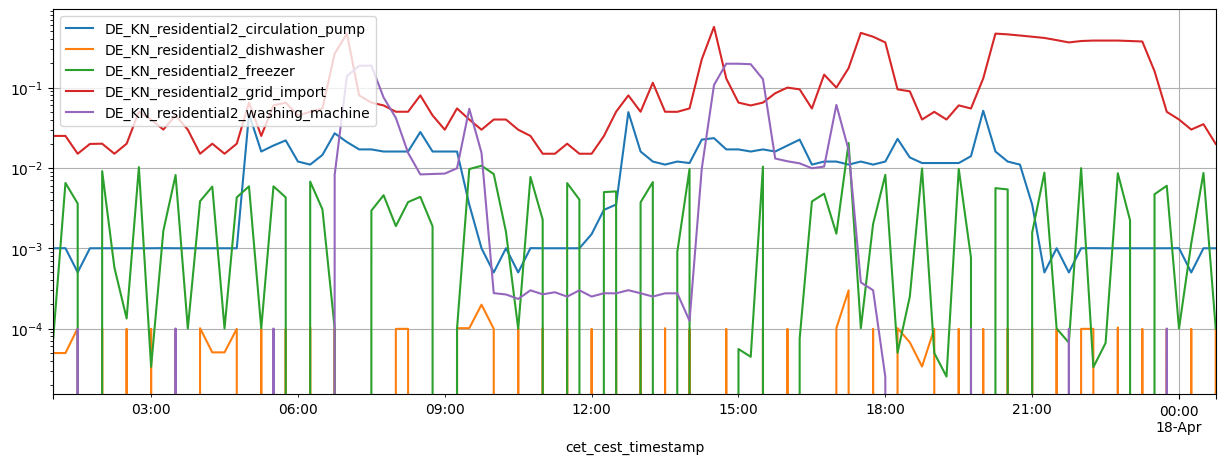

In [9]:
t_start = pd.to_datetime('2015-04-17 00:00:00+01:00')
t_end = pd.to_datetime('2015-04-17 23:45:00+01')
print(t_start, t_end)
df_filtered = df_diff[(df_diff.cet_cest_timestamp >= t_start) & (df_diff.cet_cest_timestamp <= t_end)]
df_filtered.plot(x='cet_cest_timestamp', y=[
    'DE_KN_residential2_circulation_pump', 'DE_KN_residential2_dishwasher', 'DE_KN_residential2_freezer', 
    'DE_KN_residential2_grid_import', 'DE_KN_residential2_washing_machine'
], figsize=(15, 5))
plt.grid()
plt.yscale('log')

2015-04-18 00:00:00+01:00 2015-04-18 23:45:00+01:00


c:\Users\MBE7RNG\.conda\envs\vlp-debug2\Lib\site-packages\pandas\core\indexes\base.py:7654: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


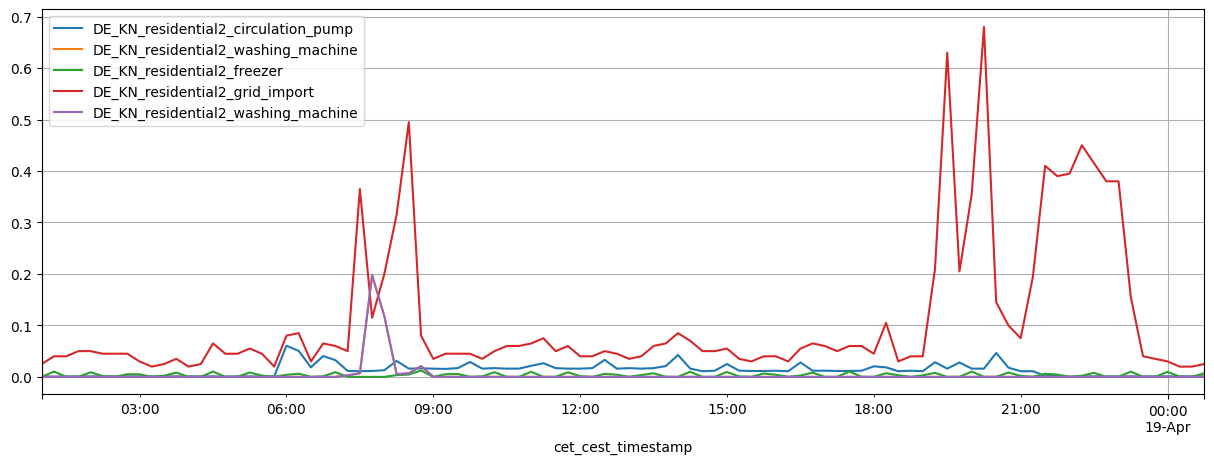

In [10]:
t_start = pd.to_datetime('2015-04-18 00:00:00+01:00')
t_end = pd.to_datetime('2015-04-18 23:45:00+01')
print(t_start, t_end)
df_filtered = df_diff[(df_diff.cet_cest_timestamp >= t_start) & (df_diff.cet_cest_timestamp <= t_end)]
df_filtered.plot(x='cet_cest_timestamp', y=[
    'DE_KN_residential2_circulation_pump', 'DE_KN_residential2_washing_machine', 'DE_KN_residential2_freezer', 
    'DE_KN_residential2_grid_import', 'DE_KN_residential2_washing_machine'
], figsize=(15, 5))
plt.grid()

2016-01-01 00:00:00+01:00 2016-12-31 23:45:00+01:00


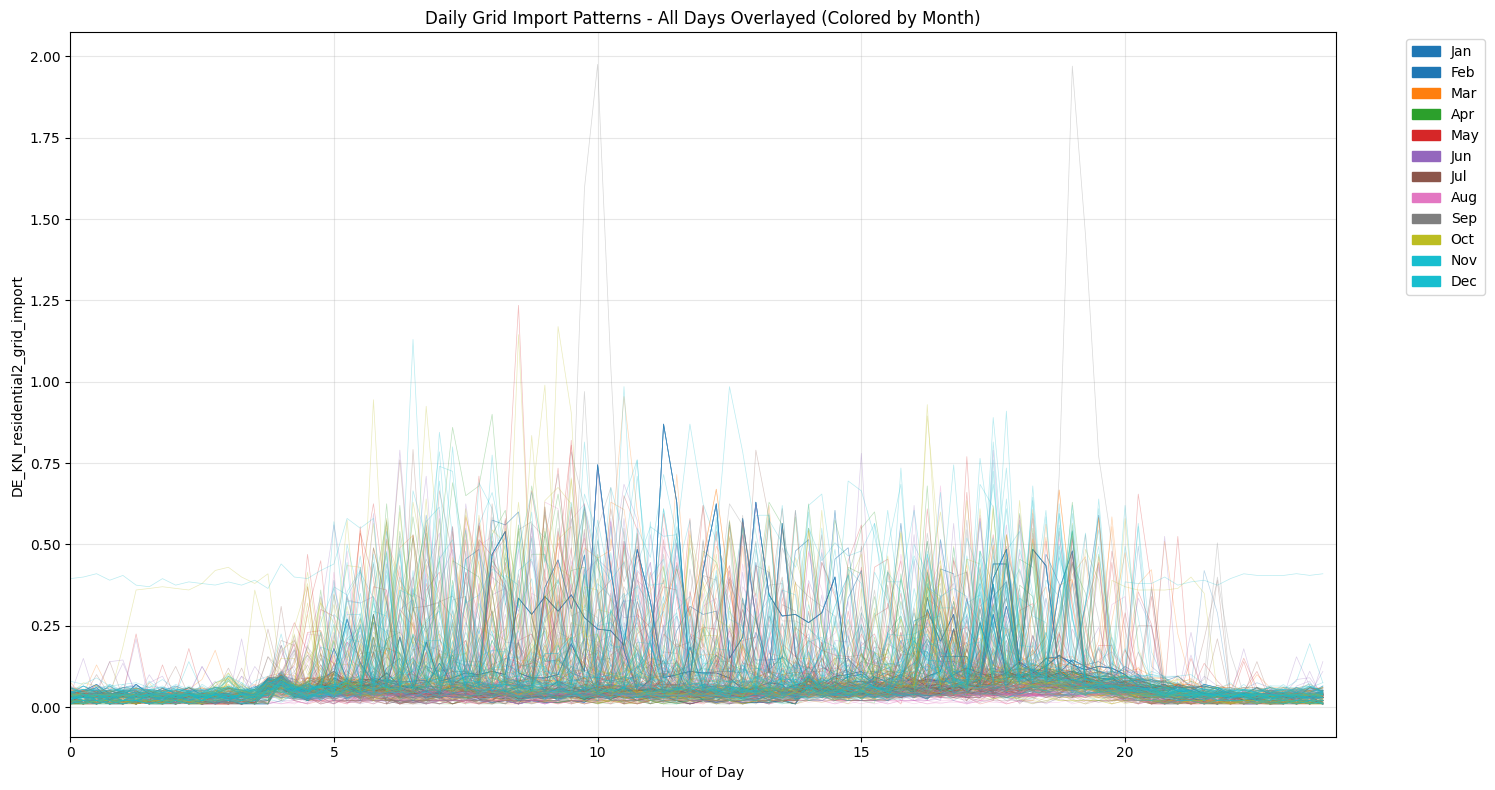

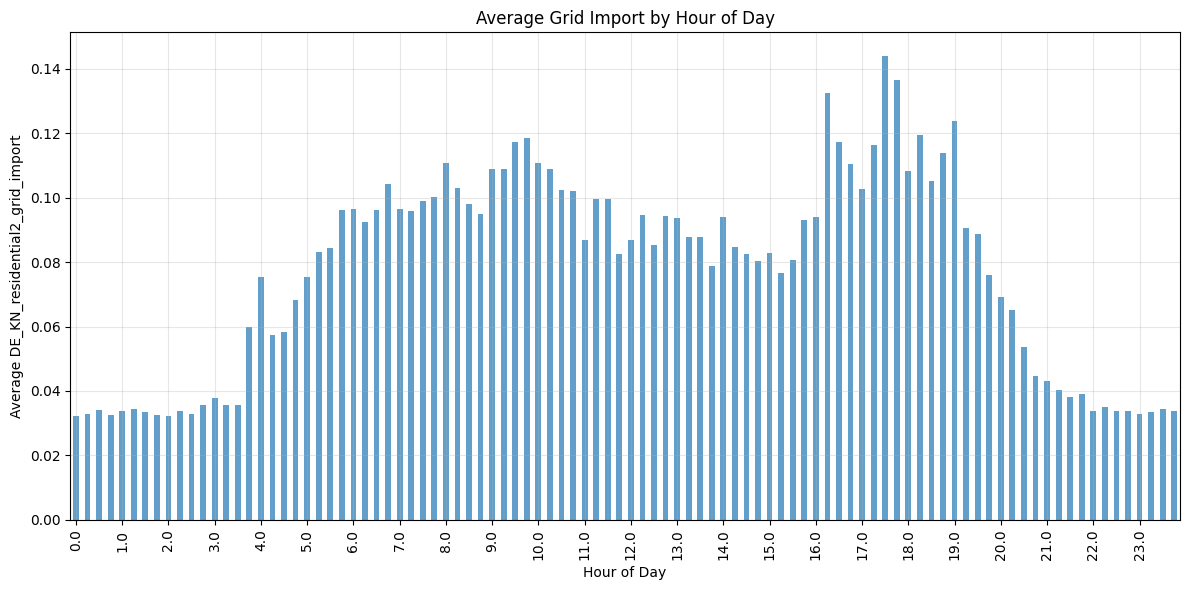

In [11]:
# Extract year, month, and day from timestamp for filtering and coloring
t_start = pd.to_datetime('2016-01-01 00:00:00+01:00')
t_end = pd.to_datetime('2016-12-31 23:45:00+01')
print(t_start, t_end)
df_plot = df_diff[(df_diff.cet_cest_timestamp >= t_start) & (df_diff.cet_cest_timestamp <= t_end)].copy()
df_plot['datetime'] = pd.to_datetime(df_plot['cet_cest_timestamp'], utc=True)
df_plot['year'] = df_plot['datetime'].dt.year
df_plot['month'] = df_plot['datetime'].dt.month
df_plot['day_of_year'] = df_plot['datetime'].dt.dayofyear
df_plot['hour_minute'] = df_plot['datetime'].dt.hour + df_plot['datetime'].dt.minute/60

# Create color map for months
import matplotlib.cm as cm
colors = cm.tab10(np.linspace(0, 1, 12))

# Plot
plt.figure(figsize=(15, 8))
for year in df_plot['year'].unique():
    if pd.isna(year):
        continue
    for day in range(1, 367):  # Cover all possible days in a year
        day_data = df_plot[(df_plot['year'] == year) & (df_plot['day_of_year'] == day)]
        if len(day_data) > 0 and not day_data['DE_KN_residential2_grid_import'].isna().all():
            month = day_data['month'].iloc[0]
            plt.plot(day_data['hour_minute'], day_data['DE_KN_residential2_grid_import'], 
                    color=colors[month-1], alpha=0.3, linewidth=0.5)

plt.xlabel('Hour of Day')
plt.ylabel('DE_KN_residential2_grid_import')
plt.title('Daily Grid Import Patterns - All Days Overlayed (Colored by Month)')
plt.grid(True, alpha=0.3)
plt.xlim(0, 24)

# Create legend for months
import matplotlib.patches as mpatches
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
legend_patches = [mpatches.Patch(color=colors[i], label=month_names[i]) for i in range(12)]
plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Create histogram of grid import by hour of day
plt.figure(figsize=(12, 6))
hourly_data = df_plot.groupby('hour_minute')['DE_KN_residential2_grid_import'].mean()
hourly_data.plot(kind='bar', alpha=0.7)
plt.xlabel('Hour of Day')
plt.ylabel('Average DE_KN_residential2_grid_import')
plt.title('Average Grid Import by Hour of Day')
plt.grid(True, alpha=0.3)
plt.xticks(range(0,len(hourly_data),4),  rotation=90)
plt.tight_layout()
plt.show()

Yearly average daily consumption:
      DE_KN_residential2_circulation_pump  DE_KN_residential2_dishwasher  \
year                                                                       
2015                             0.052002                       0.000299   
2016                             1.100029                       0.769988   

      DE_KN_residential2_freezer  DE_KN_residential2_grid_import  \
year                                                               
2015                    0.011000                        0.130127   
2016                    0.140239                        7.429155   

      DE_KN_residential2_washing_machine  
year                                      
2015                            0.000100  
2016                            0.421919  


<Figure size 1500x1000 with 0 Axes>

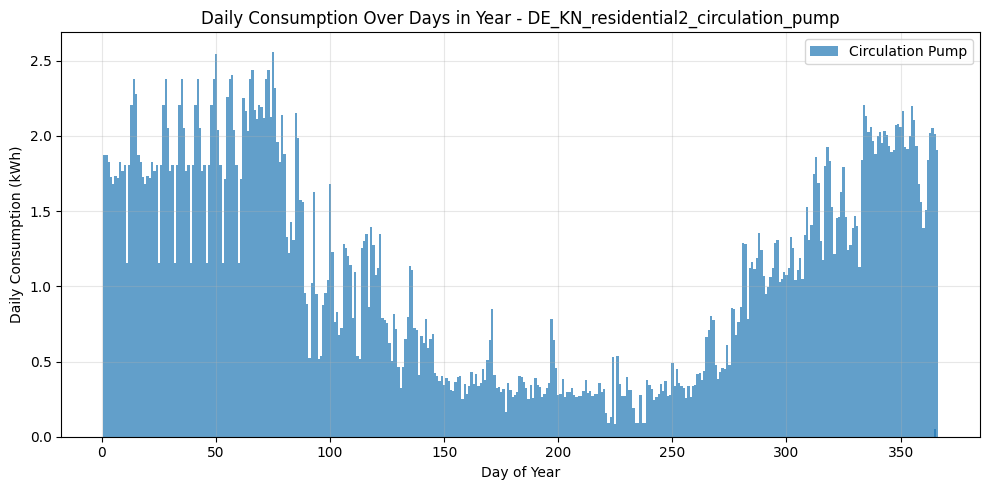

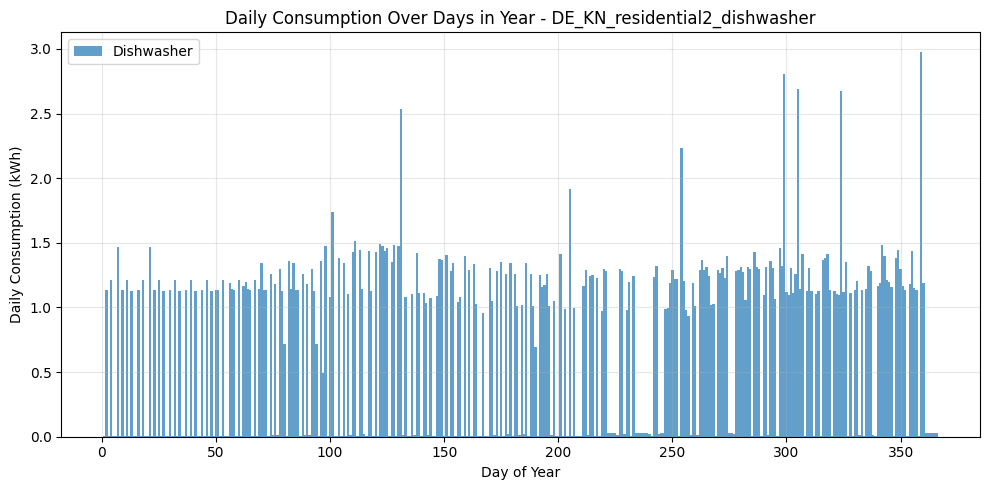

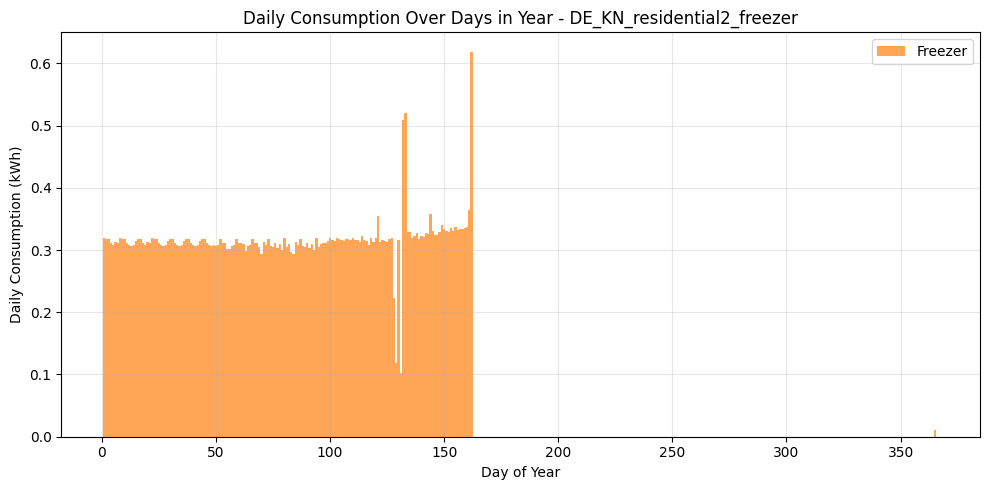

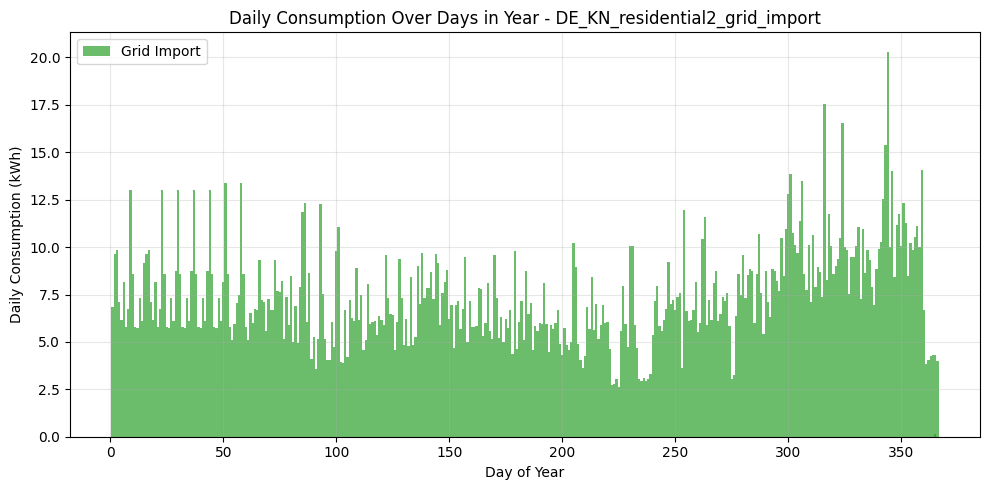

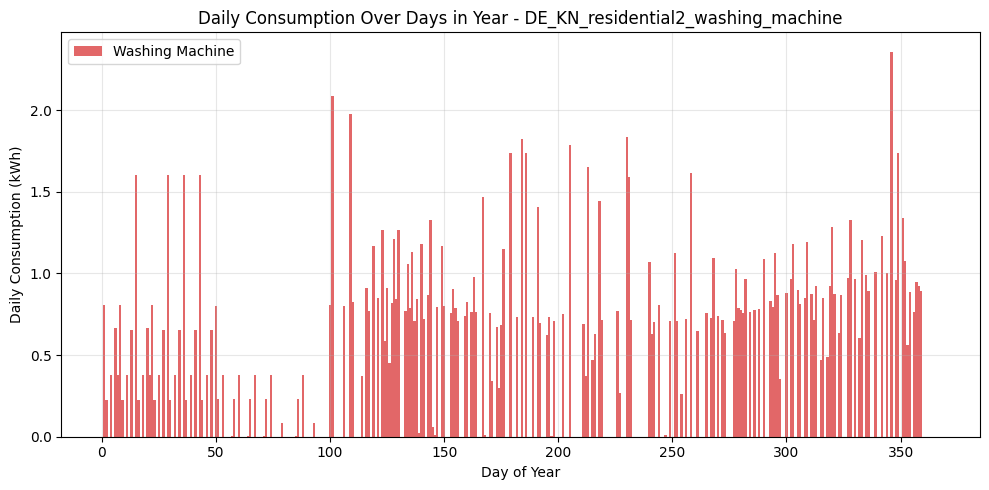

In [17]:
# calculate sums
# Calculate daily sums for each device
daily_sums = df_plot.groupby(['year', 'day_of_year']).agg({
    'DE_KN_residential2_circulation_pump': 'sum',
    'DE_KN_residential2_dishwasher': 'sum',
    'DE_KN_residential2_freezer': 'sum',
    'DE_KN_residential2_grid_import': 'sum',
    'DE_KN_residential2_washing_machine': 'sum'
}).reset_index()

# Calculate yearly averages
yearly_avg = daily_sums.groupby('year').agg({
    'DE_KN_residential2_circulation_pump': 'mean',
    'DE_KN_residential2_dishwasher': 'mean',
    'DE_KN_residential2_freezer': 'mean',
    'DE_KN_residential2_grid_import': 'mean',
    'DE_KN_residential2_washing_machine': 'mean'
})

print("Yearly average daily consumption:")
print(yearly_avg)

# Plot daily consumption over days in year
plt.figure(figsize=(15, 10))

# Get device names for cleaner labels
devices = {
    'DE_KN_residential2_circulation_pump': 'Circulation Pump',
    'DE_KN_residential2_dishwasher': 'Dishwasher',
    'DE_KN_residential2_freezer': 'Freezer',
    'DE_KN_residential2_grid_import': 'Grid Import',
    'DE_KN_residential2_washing_machine': 'Washing Machine'
}

# Also create a combined plot showing all devices
for i, device in enumerate(devices):
    plt.figure(figsize=(10, 5))
    plt.bar(daily_sums['day_of_year'], daily_sums[device], 
        label=devices.get(device, device), 
        color=colors[i % len(colors)], alpha=0.7, width=1)

    plt.xlabel('Day of Year')
    plt.ylabel('Daily Consumption (kWh)')
    plt.title(f'Daily Consumption Over Days in Year - {device}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

Average hourly consumption:
       hour_minute  DE_KN_residential2_circulation_pump  \
count    96.000000                            96.000000   
mean     11.875000                             0.011460   
std       6.964194                             0.006474   
min       0.000000                             0.004290   
25%       5.937500                             0.005082   
50%      11.875000                             0.010699   
75%      17.812500                             0.015909   
max      23.750000                             0.042709   

       DE_KN_residential2_dishwasher  DE_KN_residential2_freezer  \
count                      96.000000                   96.000000   
mean                        0.008021                    0.003312   
std                         0.008912                    0.000785   
min                         0.000094                    0.001899   
25%                         0.000150                    0.002765   
50%                         0.00

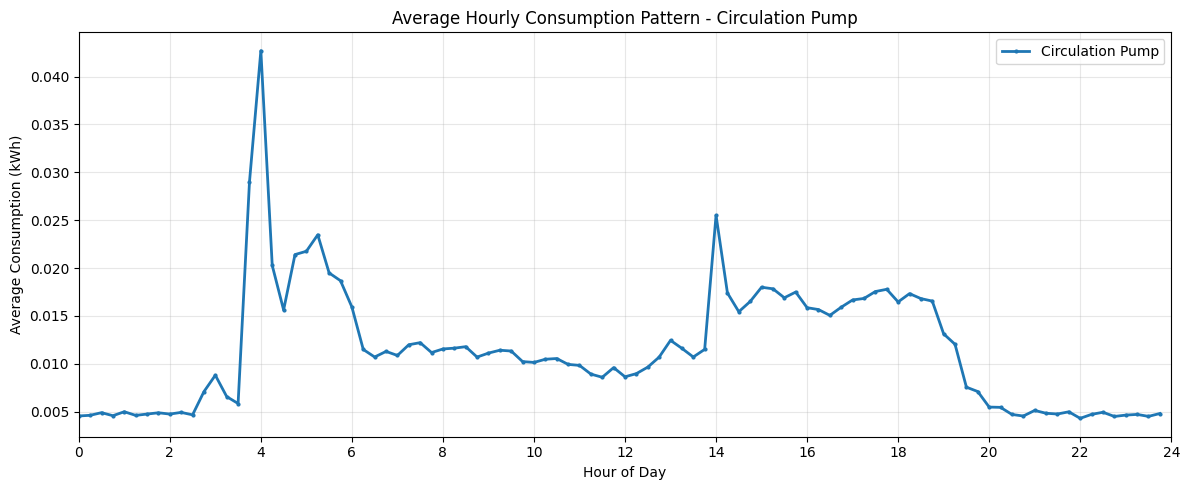

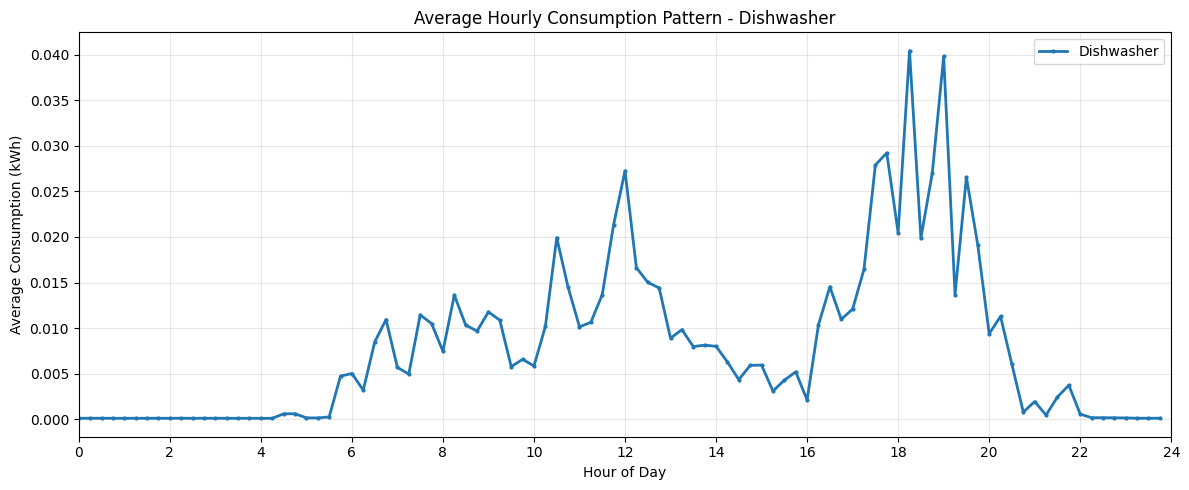

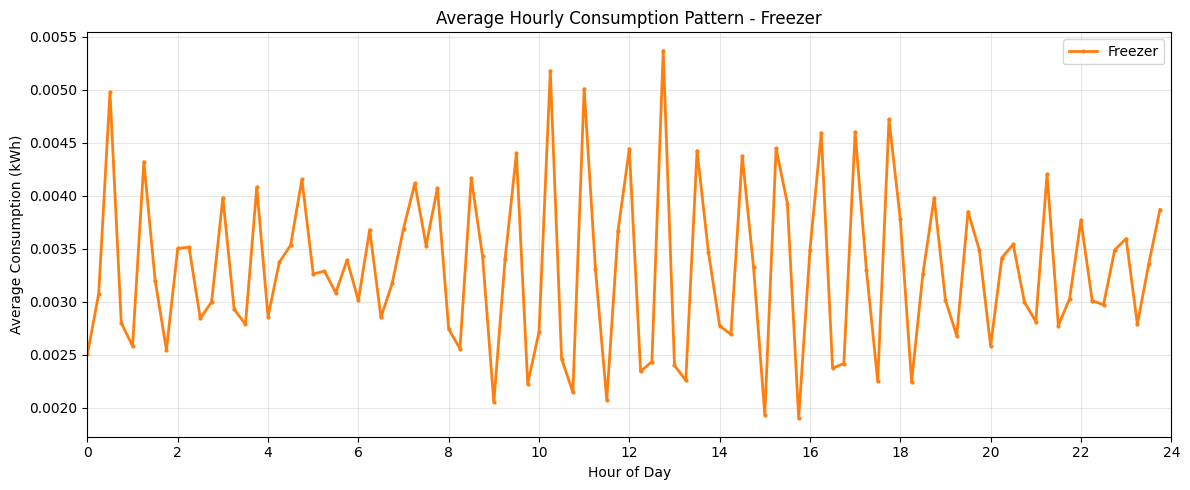

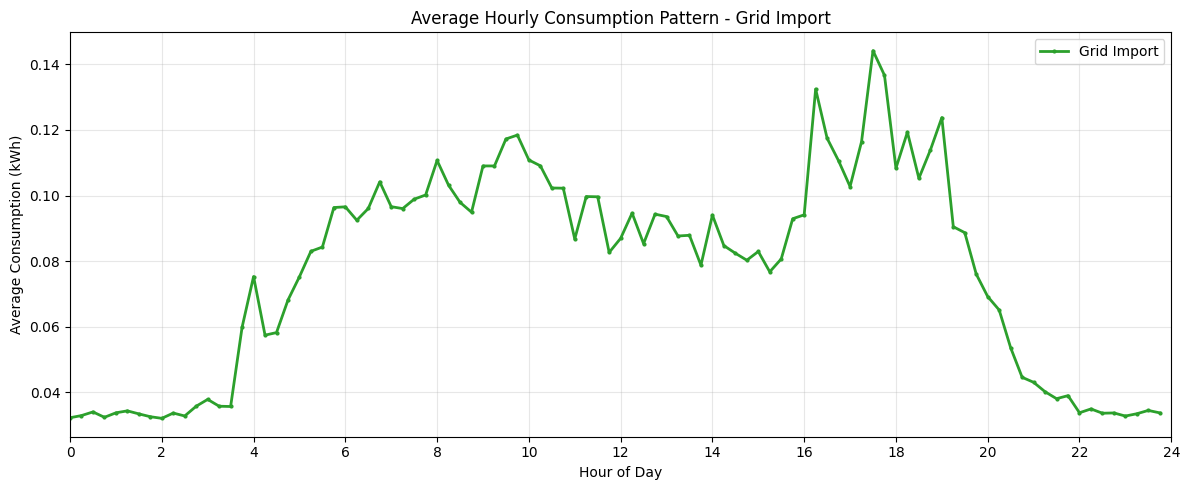

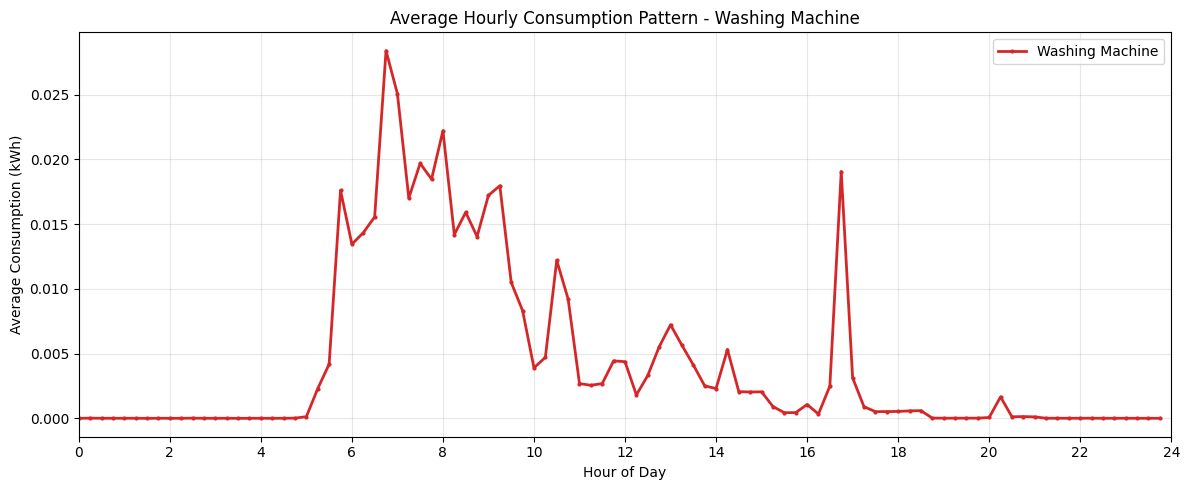

Average daily consumption by day of week:
   day_of_week   day_name  DE_KN_residential2_circulation_pump  \
0            0     Monday                             0.009955   
1            1    Tuesday                             0.010792   
2            2  Wednesday                             0.011484   
3            3   Thursday                             0.011590   
4            4     Friday                             0.012272   
5            5   Saturday                             0.012489   
6            6     Sunday                             0.011603   

   DE_KN_residential2_dishwasher  DE_KN_residential2_freezer  \
0                       0.009531                    0.003291   
1                       0.006852                    0.003174   
2                       0.008968                    0.003346   
3                       0.007702                    0.003346   
4                       0.006920                    0.003514   
5                       0.010391             

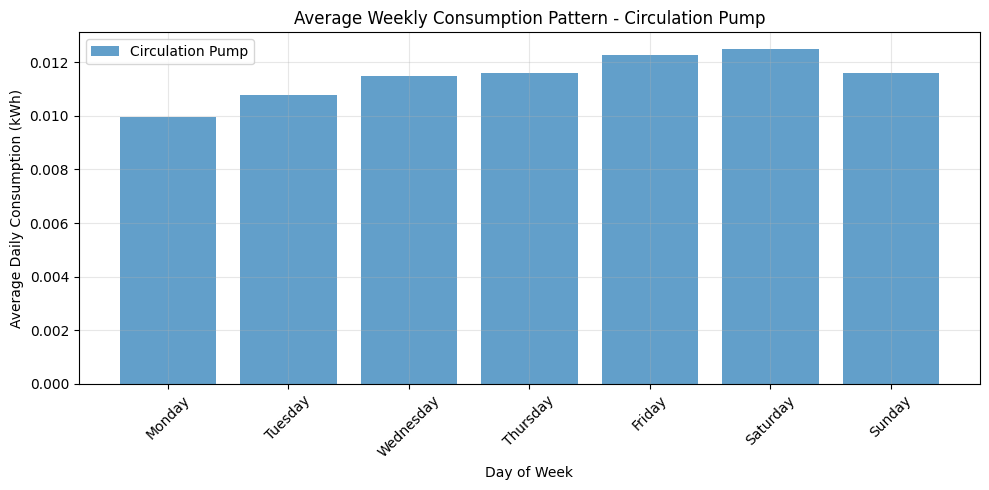

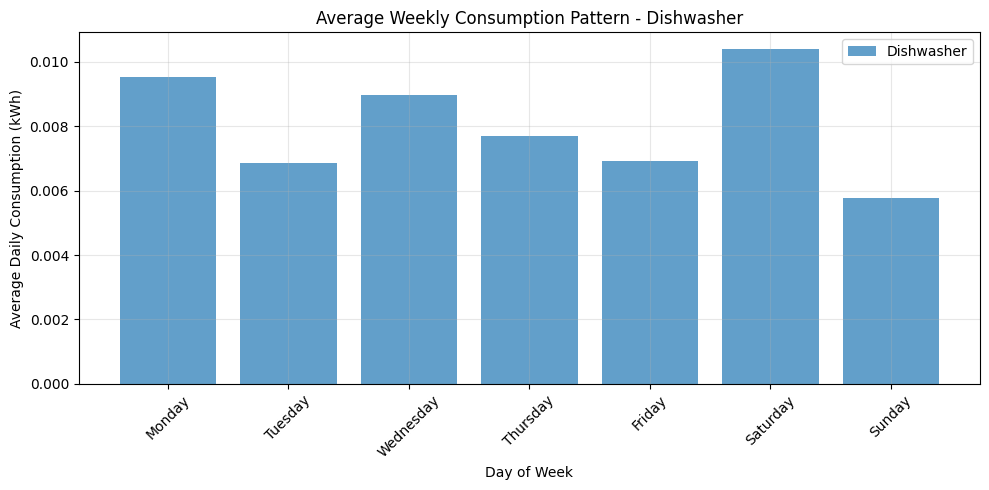

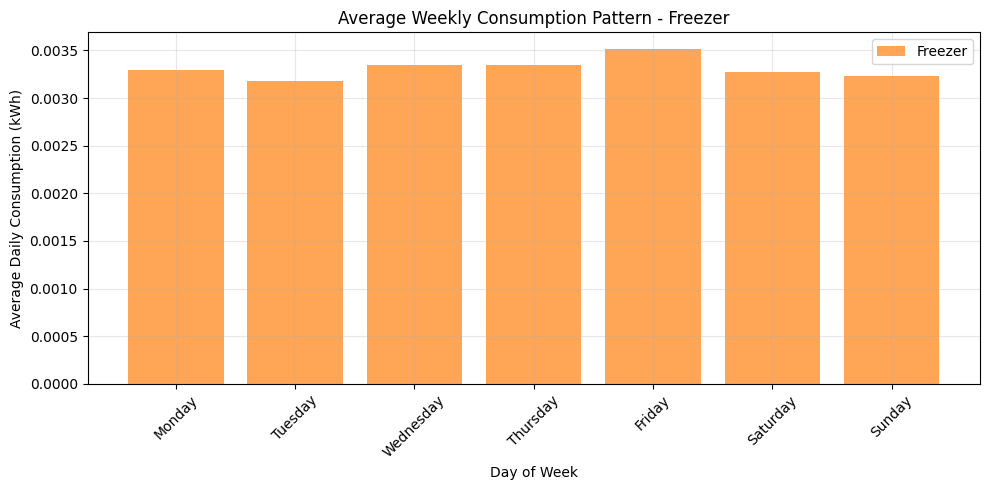

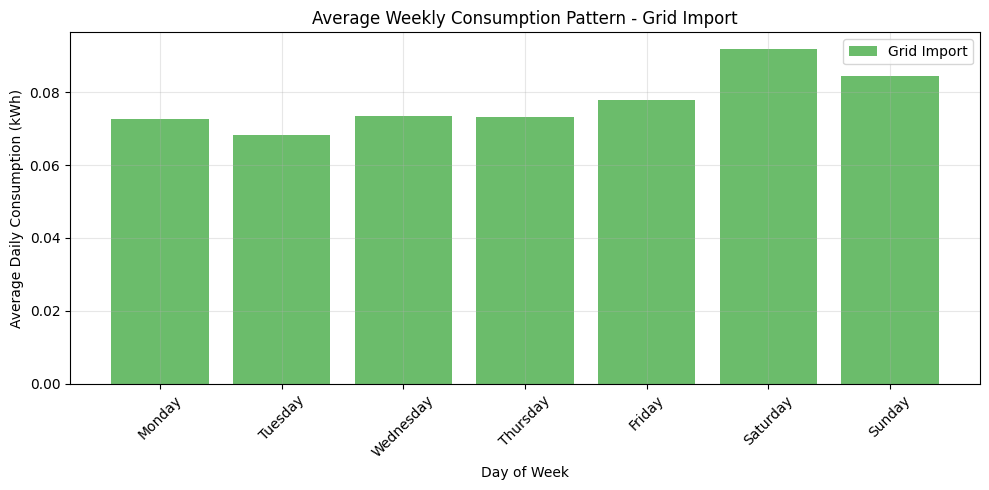

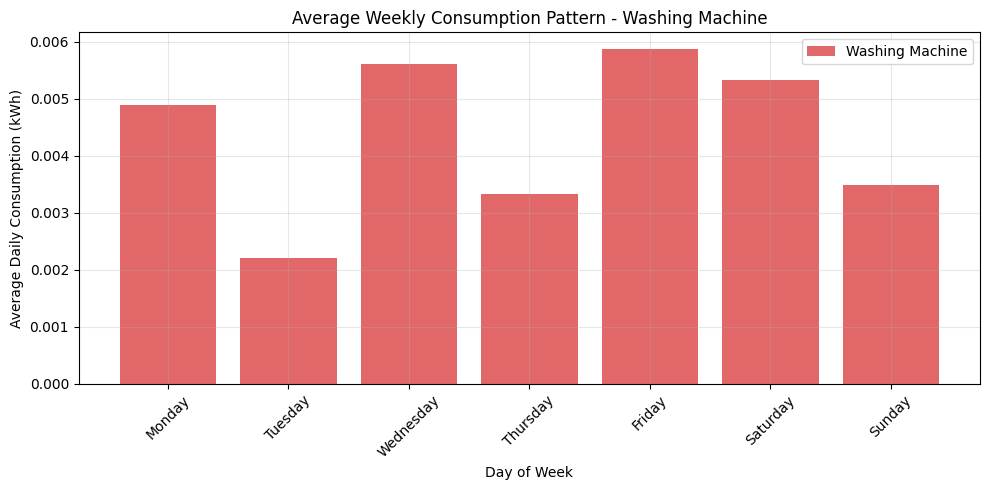

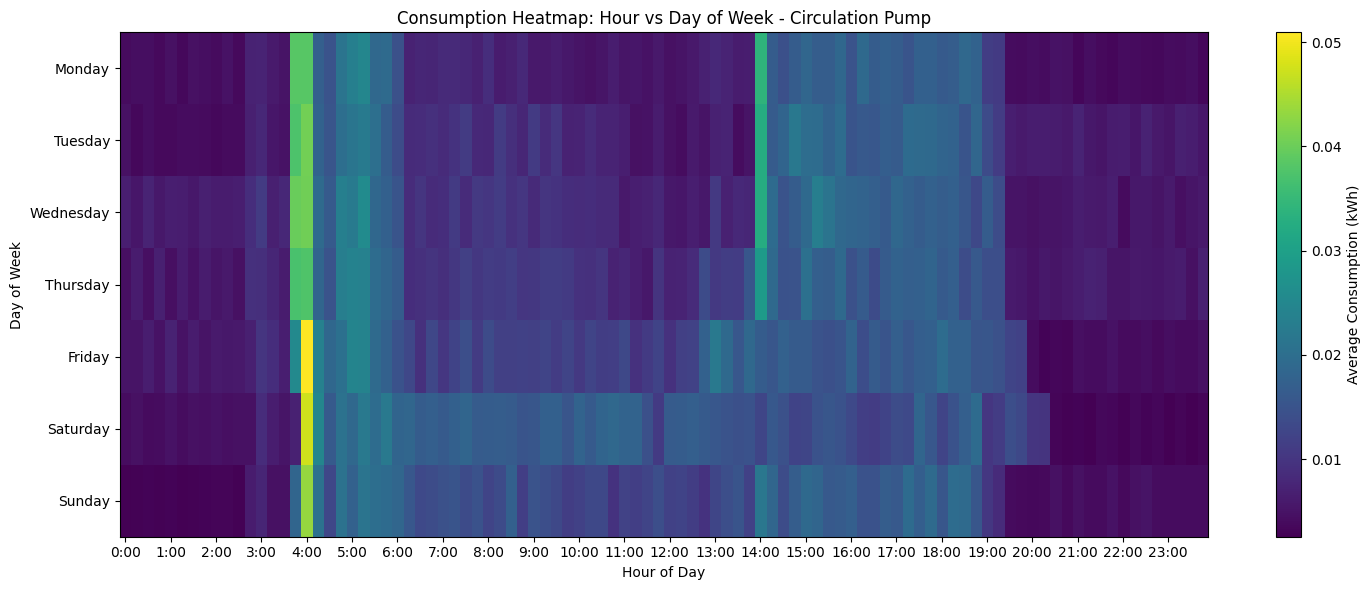

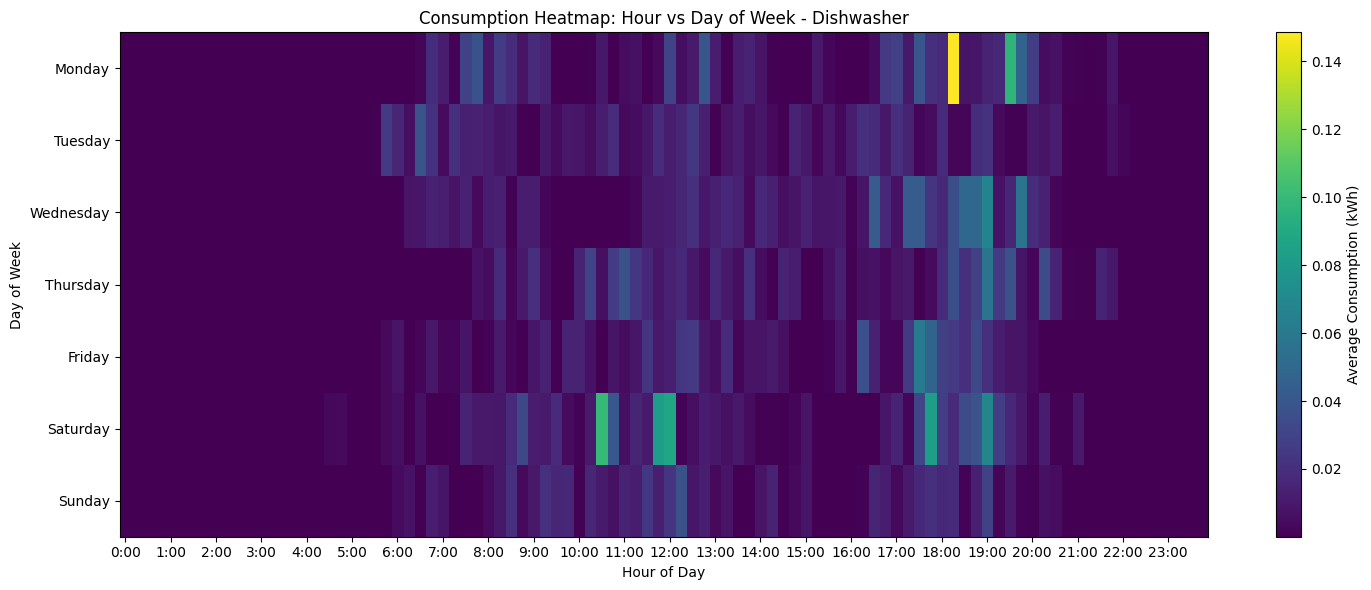

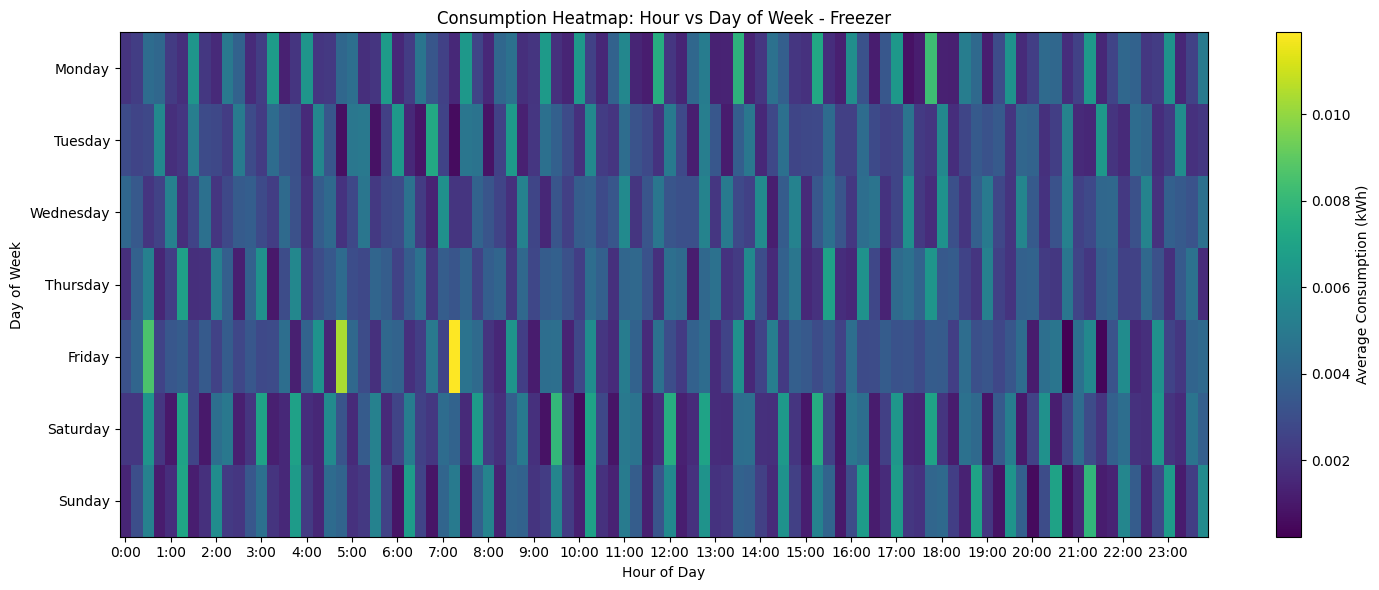

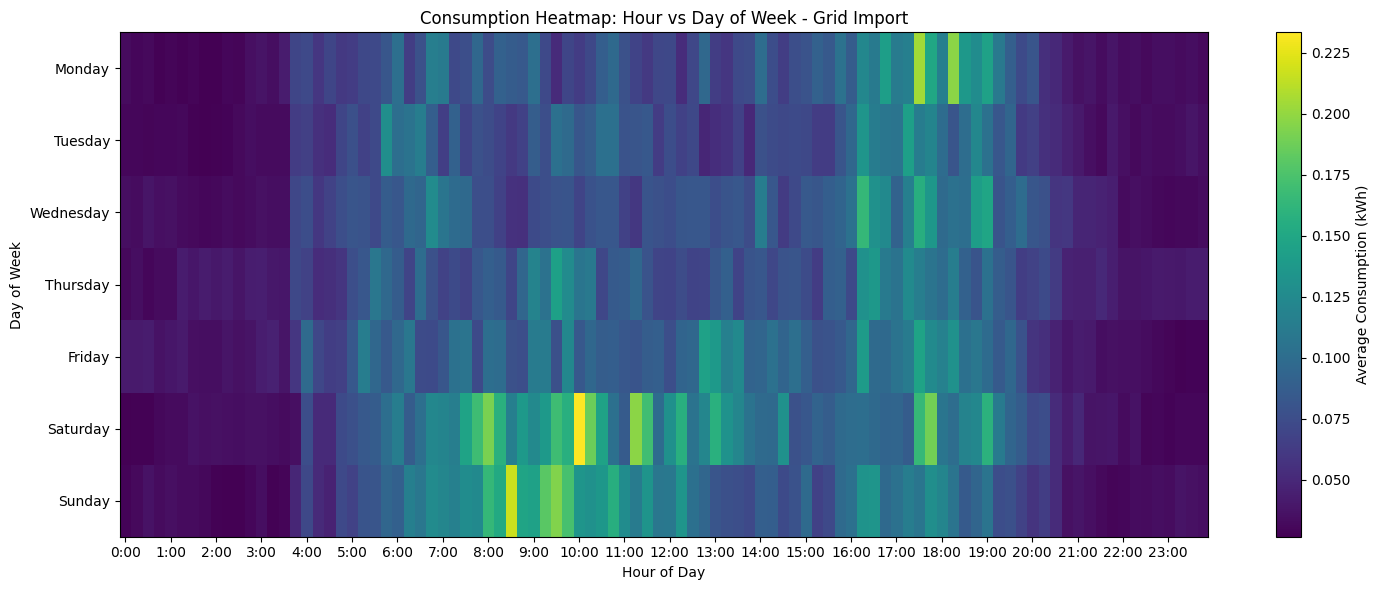

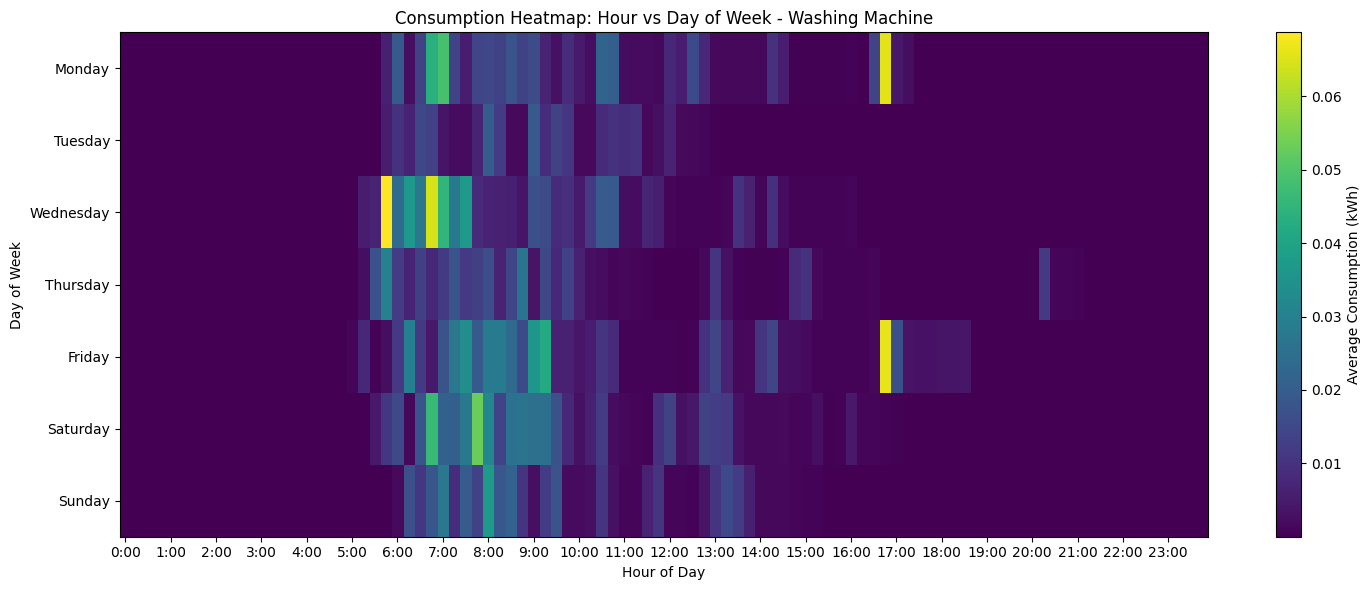

In [19]:
# Calculate hourly averages for each device
hourly_avg = df_plot.groupby('hour_minute').agg({
    'DE_KN_residential2_circulation_pump': 'mean',
    'DE_KN_residential2_dishwasher': 'mean',
    'DE_KN_residential2_freezer': 'mean',
    'DE_KN_residential2_grid_import': 'mean',
    'DE_KN_residential2_washing_machine': 'mean'
}).reset_index()

print("Average hourly consumption:")
print(hourly_avg.describe())

# Plot hourly consumption patterns
for i, device in enumerate(devices):
    plt.figure(figsize=(12, 5))
    plt.plot(hourly_avg['hour_minute'], hourly_avg[device], 
             label=devices.get(device, device), 
             color=colors[i % len(colors)], linewidth=2, marker='o', markersize=2)
    
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Consumption (kWh)')
    plt.title(f'Average Hourly Consumption Pattern - {devices[device]}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 24)
    plt.xticks(range(0, 25, 2))
    plt.tight_layout()
    plt.show()

# Add day of week analysis
df_plot['day_of_week'] = df_plot['datetime'].dt.dayofweek  # 0=Monday, 6=Sunday
df_plot['day_name'] = df_plot['datetime'].dt.day_name()

# Calculate daily averages by day of week
weekly_pattern = df_plot.groupby(['day_of_week', 'day_name']).agg({
    'DE_KN_residential2_circulation_pump': 'mean',
    'DE_KN_residential2_dishwasher': 'mean',
    'DE_KN_residential2_freezer': 'mean',
    'DE_KN_residential2_grid_import': 'mean',
    'DE_KN_residential2_washing_machine': 'mean'
}).reset_index()

print("Average daily consumption by day of week:")
print(weekly_pattern)

# Plot weekly consumption patterns
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for i, device in enumerate(devices):
    plt.figure(figsize=(10, 5))
    plt.bar(weekly_pattern['day_name'], weekly_pattern[device], 
            label=devices.get(device, device), 
            color=colors[i % len(colors)], alpha=0.7)
    
    plt.xlabel('Day of Week')
    plt.ylabel('Average Daily Consumption (kWh)')
    plt.title(f'Average Weekly Consumption Pattern - {devices[device]}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Create a combined heatmap showing hour vs day of week patterns
for device in devices:
    # Create hourly averages by day of week
    heatmap_data = df_plot.groupby(['day_of_week', 'hour_minute'])[device].mean().unstack(fill_value=0)
    
    plt.figure(figsize=(15, 6))
    plt.imshow(heatmap_data.values, cmap='viridis', aspect='auto')
    plt.colorbar(label='Average Consumption (kWh)')
    plt.yticks(range(7), day_names)
    plt.xlabel('Hour of Day')
    plt.ylabel('Day of Week')
    plt.title(f'Consumption Heatmap: Hour vs Day of Week - {devices[device]}')
    
    # Add hour labels on x-axis
    hour_ticks = range(0, len(heatmap_data.columns), 4)
    plt.xticks(hour_ticks, [f'{int(heatmap_data.columns[i])}:00' for i in hour_ticks])
    plt.tight_layout()
    plt.show()